In [1]:
import geopandas as gpd
import pandas as pd

# 1. Census sections

The Municipality of Rome has been divided into __13.656 census sections__ ([see them here](http://worldmap.harvard.edu/maps/4563)).

## Spatial sub-division

In [2]:
PATH_TO_DATA = '../data/external/ISTAT_census_sections_Lazio/'
#URL_TO_DATA = 'https://www.istat.it/storage/cartografia/basi_territoriali/WGS_84_UTM/2011/R12_11_WGS84.zip'

In [3]:
gdf = gpd.read_file(PATH_TO_DATA+'R12_11_WGS84.shp')
gdf.head()

,COD_REG,COD_ISTAT,PRO_COM,SEZ2011,SEZ,COD_STAGNO,COD_FIUME,COD_LAGO,COD_LAGUNA,COD_VAL_P,...,COD_MONT_D,LOC2011,COD_LOC,TIPO_LOC,COM_ASC,COD_ASC,ACE,Shape_Leng,Shape_Area,geometry
0,12.0,12058032.0,58032.0,580320000336,336.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.803210e+09,10002.0,1.0,0.0,0,3,210.202620,1499.504976,"POLYGON ((732733.159 4662740.620, 732772.235 4..."
1,12.0,12058032.0,58032.0,580320000394,394.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.803210e+09,10002.0,1.0,0.0,0,3,507.240049,16176.272548,"POLYGON ((732485.656 4661824.801, 732591.233 4..."
2,12.0,12058032.0,58032.0,580320000552,552.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.803210e+09,10002.0,1.0,0.0,0,3,266.857827,2433.571290,"POLYGON ((732888.546 4662813.630, 732907.135 4..."
3,12.0,12058032.0,58032.0,580320000331,331.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.803210e+09,10002.0,1.0,0.0,0,3,355.718849,5894.913818,"POLYGON ((732455.447 4662849.874, 732504.592 4..."
4,12.0,12058032.0,58032.0,580320000546,546.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.803210e+09,10002.0,1.0,0.0,0,3,2202.341165,110518.345512,"POLYGON ((733793.196 4661278.834, 733808.985 4..."


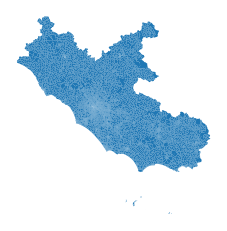

In [10]:
ax = gdf.plot()
ax.set_axis_off()

In [11]:
# code for selecting only Rome's sections
PRO_COM_ROME = 58091

(13656, 25)


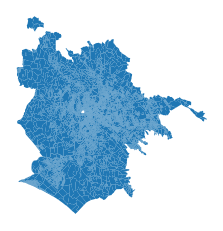

In [12]:
gdf_rome = gdf[gdf['PRO_COM'] == PRO_COM_ROME]
print(gdf_rome.shape)

ax = gdf_rome.plot()
ax.set_axis_off()

## Census data

In [17]:
from zipfile import ZipFile
import io
from urllib.request import urlopen

r = urlopen("https://www.istat.it/storage/cartografia/variabili-censuarie/dati-cpa_2011.zip").read()
file = ZipFile(io.BytesIO(r))
df = pd.read_csv(file.open("Sezioni di Censimento/R12_indicatori_2011_sezioni.csv"), sep=';')
df.head()

,CODREG,REGIONE,CODPRO,PROVINCIA,CODCOM,COMUNE,PROCOM,SEZ2011,NSEZ,ACE,...,E22,E23,E24,E25,E26,E27,E28,E29,E30,E31
0,12,Lazio,56,Viterbo,1,Acquapendente,56001,560010000001,1,0,...,18,23,11,14,3,406,62,26,1,0
1,12,Lazio,56,Viterbo,1,Acquapendente,56001,560010000002,2,0,...,38,34,31,4,1,481,89,52,5,0
2,12,Lazio,56,Viterbo,1,Acquapendente,56001,560010000003,3,0,...,50,28,16,1,0,324,48,68,6,0
3,12,Lazio,56,Viterbo,1,Acquapendente,56001,560010000004,4,0,...,81,38,12,2,0,508,34,156,61,3
4,12,Lazio,56,Viterbo,1,Acquapendente,56001,560010000005,5,0,...,69,73,30,3,0,665,29,213,3,0


In [16]:
## features from 2011 census
df_vars_description = pd.read_csv(file.open('Sezioni di Censimento/tracciato_2011_sezioni.csv'), sep=';', encoding='latin1')
map__var_name__def = {var_name : definition for var_name,definition in zip(df_vars_description.loc[12:,'NOME_CAMPO'],df_vars_description.loc[12:,'DEFINIZIONE'])}
map__var_name__def

{'P1': 'Popolazione residente - totale',
 'P2': 'Popolazione residente - maschi',
 'P3': 'Popolazione residente - femmine',
 'P4': 'Popolazione residente - celibi/nubili',
 'P5': 'Popolazione residente - coniugati/e (+ separati/e di fatto)',
 'P6': 'Popolazione residente - separati/e legalmente',
 'P7': 'Popolazione residente - vedovi/e',
 'P8': 'Popolazione residente - divorziati/e',
 'P9': 'Popolazione residente - maschi celibi',
 'P10': 'Popolazione residente - maschi coniugati o separati di fatto',
 'P11': 'Popolazione residente - maschi separati legalmente',
 'P12': 'Popolazione residente - maschi vedovi',
 'P13': 'Popolazione residente - maschi divorziati',
 'P14': 'Popolazione residente - età < 5 anni',
 'P15': 'Popolazione residente - età 5 - 9 anni',
 'P16': 'Popolazione residente - età 10 - 14 anni',
 'P17': 'Popolazione residente - età 15 - 19 anni',
 'P18': 'Popolazione residente - età 20 - 24 anni',
 'P19': 'Popolazione residente - età 25 - 29 anni',
 'P20': 'Popolazione r

In [18]:
## selecting data for Rome

df_rome = df[df['PROCOM'] == PRO_COM_ROME]
print(df_rome.shape)

(12648, 152)


In [19]:
### JOIN

gdf_rome_census = gdf_rome.merge(df_rome, how='left', on='SEZ2011')

In [20]:
import mapclassify

q8 = mapclassify.Quantiles(gdf_rome_census['P1'], k=8)
q8

Quantiles               

    Interval       Count
------------------------
[   nan,  12.00] |  3429
( 12.00,  48.00] |  1701
( 48.00,  90.00] |  1706
( 90.00, 149.00] |  1705
(149.00, 236.38] |  1700
(236.38, 371.00] |  1711
(371.00, 641.00] |  1704
(641.00,    nan] |     0

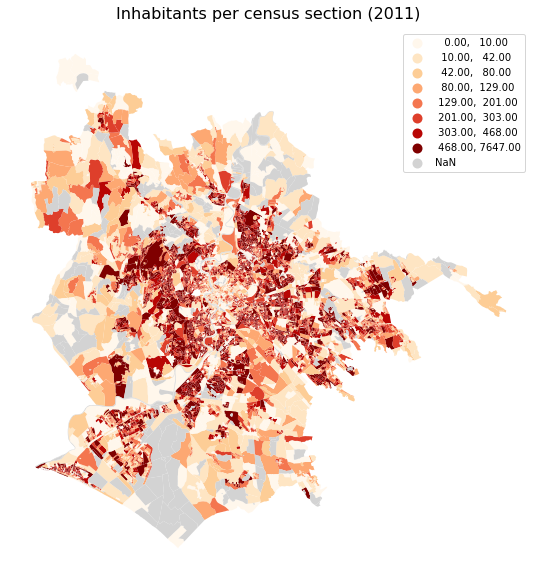

In [32]:
ax = gdf_rome_census.plot(column='P1', figsize=(10,10), cmap='OrRd', 
                          scheme='Quantiles', k=8, 
                          missing_kwds={'color': 'lightgrey'}, 
                          legend=True)
ax.set_title('Inhabitants per census section (2011)', fontsize=16, pad=10)
ax.set_axis_off()
fig = ax.get_figure()
#fig.savefig('rome_pop_census_2011.png', dpi=300)

# 2. Urban areas

A higher spatial sub-division of Rome is given by its __155 urban areas__.

## Spatial sub-division

In [21]:
URL_TO_DATA = 'https://drive.google.com/open?id=0B61k9xip8kT3Qk1MbzBGQUNaT1E'.replace('/open?', '/uc?')

gdf_rome = gpd.read_file(URL_TO_DATA)
print(gdf_rome.shape)
gdf_rome.head()

(155, 8)


,Name,ZU,CODZU,TIPZU,MUNICIPIO,GRA,SUPERFICIE,geometry
0,Tuscolano Nord,Tuscolano Nord,9A,1.0,7.0,1.0,107.0,"POLYGON Z ((294658.952 4639994.348 0.000, 2946..."
1,Tuscolano Sud,Tuscolano Sud,9B,1.0,7.0,1.0,316.0,"POLYGON Z ((294988.147 4637592.340 0.000, 2949..."
2,Tor Fiscale,Tor Fiscale,9C,1.0,7.0,1.0,91.0,"POLYGON Z ((295420.892 4637038.028 0.000, 2954..."
3,Appio,Appio,9D,1.0,7.0,1.0,134.0,"POLYGON Z ((293294.576 4638903.640 0.000, 2932..."
4,Latino,Latino,9E,1.0,7.0,1.0,159.0,"POLYGON Z ((292789.674 4637982.143 0.000, 2927..."


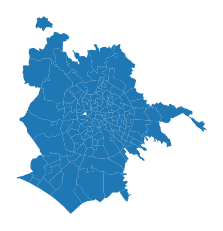

In [22]:
ax = gdf_rome.plot()
ax.set_axis_off()

## Data
At this level, we can use data like the ones from the project [_mapparoma_](https://www.mapparoma.info/open-data/).

Let's take their data about public transport...

In [42]:
URL_TO_DATA = 'https://drive.google.com/open?id=0B61k9xip8kT3ZWE5dElabDUzcFk'.replace('/open?', '/uc?')

df_rome = pd.read_excel(URL_TO_DATA, header=1, usecols=[0,1,2,3,4,5,6,7,8,9])
df_rome.head()

/home/matteo/anaconda3/envs/spatial/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Cod.,Nome,Municipio,Residenziale,Entro GRA,"N° di passaggi di bus e tram alle fermate (""stops"")","""Stops"" per minuto",Residenti,Residenti entro 10 minuti da una fermata su ferro,% residenti entro 10 minuti da una fermata su ferro
0,1A,Centro Storico,1.0,1.0,1.0,137525.0,95.503472,28727.0,8920.0,31.050928
1,1B,Trastevere,1.0,1.0,1.0,36923.0,25.640972,15519.0,1351.0,8.705458
2,1C,Aventino,1.0,1.0,1.0,33255.0,23.093750,6963.0,6963.0,100.000000
3,1D,Testaccio,1.0,1.0,1.0,16697.0,11.595139,7610.0,6308.0,82.890933
4,1E,Esquilino,1.0,1.0,1.0,85818.0,59.595833,31941.0,31941.0,100.000000


In [10]:
### JOIN

gdf_rome_urban = gdf_rome.merge(df_rome, how='left', left_on='CODZU', right_on='Cod.')

In [16]:
import mapclassify

q8 = mapclassify.Quantiles(gdf_rome_urban['% residenti entro 10 minuti da una fermata su ferro'], k=5)
q8

Quantiles               

    Interval       Count
------------------------
[  0.00,   0.00] |    42
(  0.00,  12.94] |    20
( 12.94,  56.87] |    31
( 56.87,  89.53] |    31
( 89.53, 100.00] |    31

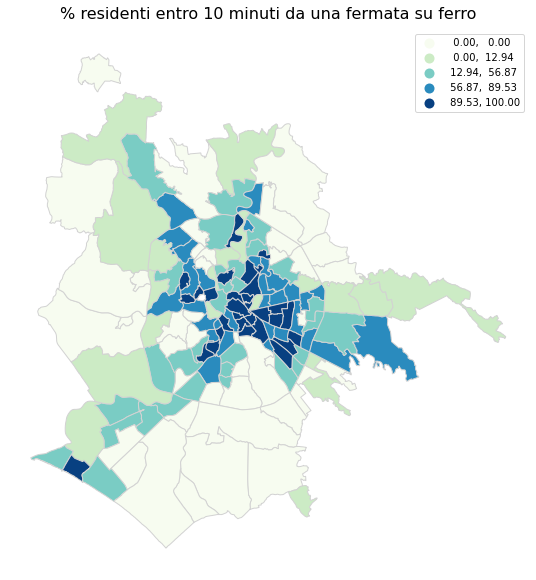

In [38]:
ax = gdf_rome_urban.plot(column='% residenti entro 10 minuti da una fermata su ferro', 
                         figsize=(10,10), cmap='GnBu', edgecolor='lightgrey',
                          scheme='Quantiles', k=5, 
                          #missing_kwds={'color': 'lightgrey'}, 
                          legend=True)
ax.set_title('% residenti entro 10 minuti da una fermata su ferro', fontsize=16, pad=10)
ax.set_axis_off()
#fig = ax.get_figure()
#fig.savefig('rome_accessibility_public_transport.png', dpi=300)